# ===========================
# CNN Image Classification Project – Rice Dataset
# Skills Highlighted: CNN, Data Preprocessing, Data Augmentation, Model Evaluation
# ===========================

# Step 1: Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array , to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

2025-09-03 03:42:02.780793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756870923.015002      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756870923.072060      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



# Step 2: Path to dataset

In [8]:
path="/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

# Step 3: Get class names and number of classes

In [9]:
img_classes=os.listdir(path)
num_classes = len(img_classes)
print("Classes:", img_classes)

Classes: ['Karacadag', 'Basmati', 'Jasmine', 'Rice_Citation_Request.txt', 'Arborio', 'Ipsala']


In [10]:
img_classes[1]

'Basmati'

# Step 4: Visualize one image per class

In [11]:
def first_img_from_each_class(path):
    img_classes=os.listdir(path)
    plt.figure(figsize=(12,12))
    img_classes = [category for category in img_classes if os.path.isdir(os.path.join(path, category))]

    for i , category in enumerate(img_classes):
         folderPath=path+"/"+category
         img_in_folder=os.listdir(folderPath)
         first_img=img_in_folder[0]
         first_imgArray=folderPath+"/"+first_img
         imgobject=image.load_img(first_imgArray)
         imageArray=image.img_to_array(imgobject)/255
         plt.subplot(1,len(img_classes),i+1)
         plt.imshow(imageArray)
         plt.title(category)


In [42]:
folderPath=os.path.join(path,category)
folderPath

'/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag'

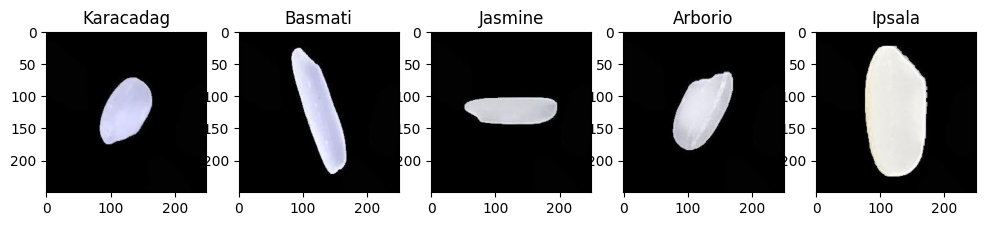

In [12]:
first_img_from_each_class(path)

# Step 5: Data generators with augmentation and validation split

In [14]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [15]:
train_data=datagen.flow_from_directory(
    path,
    target_size=(64,64),
    class_mode="categorical",
    batch_size=32,
    subset="training" 
)

test_data=datagen.flow_from_directory(
    path,
    target_size=(64,64),
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


# Step 6: Build CNN model

In [21]:
#build cnn model
from tensorflow.keras.models import Sequential
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5,activation="softmax")
    
    
])

# Step 7: Compile model

In [22]:
model.compile(optimizer="adam"
              ,loss="categorical_crossentropy"
              ,metrics=["accuracy"])

# Step 8: Train model

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [25]:
model_history=model.fit(train_data,epochs=50,validation_data=test_data,callbacks=[early_stop])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 70ms/step - accuracy: 0.8621 - loss: 0.3549 - val_accuracy: 0.9674 - val_loss: 0.0944
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9590 - loss: 0.1260 - val_accuracy: 0.9730 - val_loss: 0.0765
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9715 - loss: 0.0899 - val_accuracy: 0.9857 - val_loss: 0.0444
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 0.9803 - loss: 0.0616 - val_accuracy: 0.9914 - val_loss: 0.0285
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accuracy: 0.9931 - val_loss: 0.0222
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9884 - loss: 0.0354 - val_accuracy: 0.9925 - val_loss: 0.0248
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.9939 - val_loss: 0.0206
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 

# Step 9: Plot Train vs Validation Loss

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Text(0.5, 1.0, 'Train vs Validation Loss')

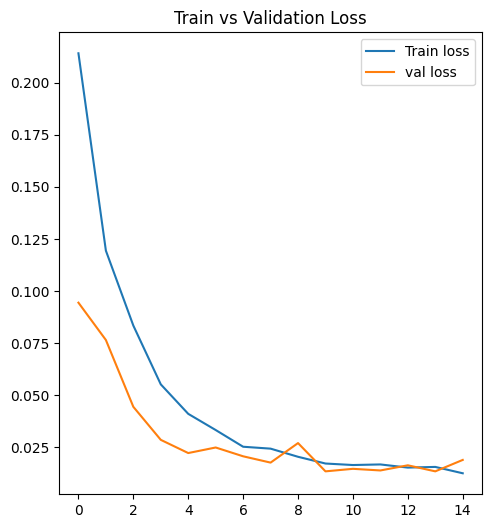

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_history.history["loss"],label="Train loss")
plt.plot(model_history.history["val_loss"] , label="val loss")

plt.legend()
plt.title("Train vs Validation Loss")

# Step 9: Plot Train vs Validation Accuracy

Text(0.5, 1.0, 'Train vs Validation accuracy')

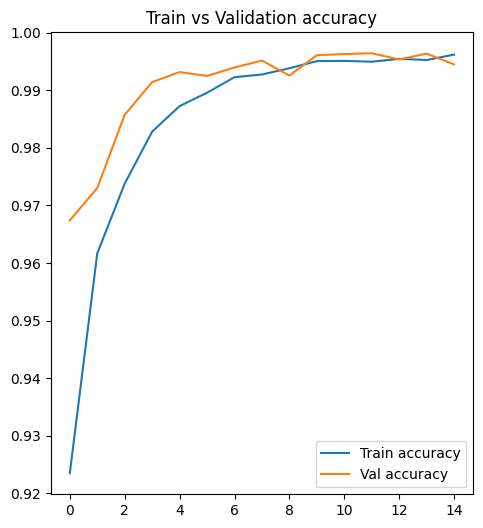

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_history.history["accuracy"] , label="Train accuracy")
plt.plot(model_history.history["val_accuracy"] , label="Val accuracy")


plt.legend()
plt.title("Train vs Validation accuracy")

# Step 10: Final evaluation on validation set

In [36]:
loss, acc = model.evaluate(test_data, verbose=0) 
print(f"Validation Accuracy: {acc*100:.2f}%")

Validation Accuracy: 99.61%


# Step 11: Save model

In [37]:
# Save model
model.save("/kaggle/working/rice_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!
